In [1]:
import pandas as pd
import numpy as np
import panel as pn
import matplotlib.pyplot as plt
pn.extension('tabulator')

import hvplot.pandas

In [2]:
df= pd.read_csv("Data/supermarket_sales.csv")

In [3]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [4]:
df.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')

**keterangan Data**

1. Invoice ID: Id penjualan yang di hasilkan oleh sistem pada komputer
2. Branch: Cabang Supermartket yaitu terdiri dari A, B, dan C
3. City: Lokasi supermarket
4. Costumer type: tipe costumer dimana tebagi menjadi 2 yaitu member dengan menggunakan kartu anggota, dan nomral tidak menggunakan kartu anggota
5. Gender: jenis kelamin dari pelanggan
6. Product Line: Kelompok kategorisasi barang umum - Aksesoris elektronik, Aksesori fashion, Makanan dan minuman, Kesehatan dan kecantikan, perabotan rumah, Olahraga.
7. Unit price: Harga setiap produk dalam $
8. quantity: Jumlah produk yang dibeli oleh pelanggan
9. Tax 5%: biaya pajak untuk pembelian pelanggan
10. Total: Total harga barang termasuk pajak
11. Date: tanggal pelanggan melakukan pembelian
12. time: Waktu pembelian (10 am hingga 9 pm)
13. payment: Pembayaran yang digunakan pelanggan untuk pembelian (tersedia 3 metode – Tunai, Kartu Kredit dan Ewallet)
14. cogs: Biaya barang yang dijual
15. gross margin percentage: Persentase margin kotor
16. gross income: Pendapatan kotor
17. Ratting: Peringkat stratifikasi pelanggan berdasarkan keseluruhan pengalaman berbelanja mereka (Dalam skala 1 hingga 10)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

**Noted:** Tidak terdapat data null

## Preprocessing Data

In [6]:
# megnubah data date menjadi data hari, bulan, dan tahun
df['Date'] = pd.to_datetime(df['Date'])

df['Day'] = df['Date'].dt.day
df['Month'] = df['Date'].dt.month
df['year'] = df['Date'].dt.year

In [7]:
df['Hours'] = pd.to_datetime(df['Time'], format='%H:%M').dt.hour
df['Minute'] = pd.to_datetime(df['Time'], format='%H:%M').dt.minute

In [8]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,...,Payment,cogs,gross margin percentage,gross income,Rating,Day,Month,year,Hours,Minute
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,...,Ewallet,522.83,4.761905,26.1415,9.1,5,1,2019,13,8
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,...,Cash,76.40,4.761905,3.8200,9.6,8,3,2019,10,29
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,...,Credit card,324.31,4.761905,16.2155,7.4,3,3,2019,13,23
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,...,Ewallet,465.76,4.761905,23.2880,8.4,27,1,2019,20,33
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,...,Ewallet,604.17,4.761905,30.2085,5.3,8,2,2019,10,37


In [9]:
df.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating', 'Day', 'Month', 'year', 'Hours', 'Minute'],
      dtype='object')

In [10]:
dfnew=df[['Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total'
        , 'Day', 'Month', 'Hours', 'Minute', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating']]

In [11]:
dfnew.head()

,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Day,Month,Hours,Minute,Payment,cogs,gross margin percentage,gross income,Rating
0,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,5,1,13,8,Ewallet,522.83,4.761905,26.1415,9.1
1,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,8,3,10,29,Cash,76.40,4.761905,3.8200,9.6
2,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3,3,13,23,Credit card,324.31,4.761905,16.2155,7.4
3,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,27,1,20,33,Ewallet,465.76,4.761905,23.2880,8.4
4,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,8,2,10,37,Ewallet,604.17,4.761905,30.2085,5.3


In [12]:
idf= dfnew.interactive()

In [13]:
dfnew['Payment'].unique()

array(['Ewallet', 'Cash', 'Credit card'], dtype=object)

In [14]:
# Radio button untuk mencari tahu data berdasarkan bulan atau harian
y_month_day= pn.widgets.RadioButtonGroup(
    name='Y month or day', 
    options=["Month", "Day","Hours"],
    button_type='success'
)
y_month_day

RadioButtonGroup(button_type='success', name='Y month or day', options=['Month', 'Day', 'Hours'], value='Month')

In [15]:
# membuat drop down untuk memilih cabang yang akan ditampilkan pada visualisasi a
branch_dropdown = pn.widgets.MultiChoice(name="Pilih Branch", options=["A", "B", "C"], 
                                    value=[ 'A', 'B', 'C'])
branch_dropdown

MultiChoice(name='Pilih Branch', options=['A', 'B', 'C'], value=['A', 'B', 'C'])

In [16]:
# membuat multichoice untuk menampilkan data berdasarkan kota cabang
city_dropdown = pn.widgets.MultiChoice(name="Pilih Kota", options=['Yangon', 'Naypyitaw', 'Mandalay']
                                       , value=[ 'Yangon', 'Naypyitaw', 'Mandalay'])
city_dropdown

MultiChoice(name='Pilih Kota', options=['Yangon', 'Naypyitaw', ...], value=['Yangon', 'Naypyitaw', ...])

In [17]:
product_dropdown = pn.widgets.Select(name='Pilih Product Line', 
                                     options=[
                                         'All','Health and beauty','Electronic accessories' ,'Home and lifestyle'
                                         ,'Sports and travel' ,'Food and beverages' ,'Fashion accessories']
                                    )
product_dropdown

Select(name='Pilih Product Line', options=['All', 'Health and beauty...], value='All')

In [18]:
rating_slider = pn.widgets.FloatSlider(name='Filter Rating', start=0, end=10, value=4)
rating_slider

FloatSlider(end=10, name='Filter Rating', value=4)

## Visualisasi

In [19]:
# mengelompokkan data penjualan berdasarkan cabang
month_day_pipeline = (
    idf[
        idf['Branch'].isin(branch_dropdown)
    ]
    # pengelompokan data berdasarkan Branch dan y_month_day lalu menjumlahkan total penjualan
    .groupby(['Branch', y_month_day])['Total'].sum()
    .reset_index()
    .sort_values(by=['Branch', y_month_day])
    .reset_index(drop=True)
)


In [20]:
# menggabungkan  dengan kolom lain
merged_pipeline = month_day_pipeline.merge(
    idf[
    ['Branch', 'City', 'Customer type', 'Gender', 'Quantity', 'Tax 5%', 'Unit price','Rating', y_month_day]
    ]
)

merged_pipeline


In [21]:
# Menggunakan plot line
# untuk melhat tren penjualan berdasarkan cabang pada rentang waktu bulanan dan harian
tot_penjualan = merged_pipeline.hvplot(
    x=y_month_day, 
    by='Branch', 
    y='Total', 
    kind='line', 
    line_width=3, 
    title="Total Penjualan Berdasarkan Cabang (Total dalam $)"
)

# Tampilkan plot
tot_penjualan


Matplotlib(Figure, tight=True)
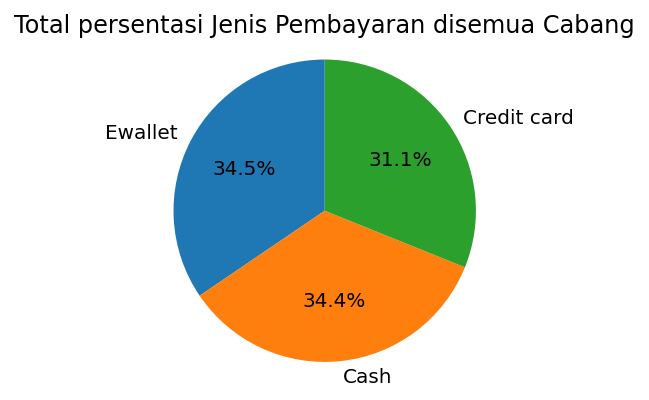

In [22]:

# Fungsi untuk membuat pie chart mengehtahui presentasi jenis payment disemua cabang
def create_payment_pie_chart(data, figsize=(4,3)):
    # Menghitung frekuensi setiap kategori
    sizes = dfnew['Payment'].value_counts()
    labels = sizes.index  # Mengambil label dari indeks
    
    # Membuat pie chart dengan matplotlib
    fig, ax = plt.subplots(figsize=figsize)
    ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
    ax.axis('equal')  # Equal aspect ratio ensures that pie chart is circular.

    # Menambahkan label dan judul
    ax.set_title('Total persentasi Jenis Pembayaran disemua Cabang')
    
    plt.close(fig)  # CLOSE THE FIGURE!
    return fig

# Menampilkan pie chart dengan Panel
pie_payment = pn.pane.Matplotlib(create_payment_pie_chart(idf), dpi=144, tight=True)
pie_payment


In [23]:
# Radio button untuk Rating perbulan dan harian
y_rating = pn.widgets.RadioButtonGroup(
    name='Y rating', 
    options=['Month', 'Day',],
    button_type='success'
)

In [24]:
# mengelompokkan data penjualan berdasarkan cabang
md_pipeline = (
    idf[
        (idf.Rating <= rating_slider)
    ]
    # pengelompokan data berdasarkan Branch dan y_month_day lalu menjumlahkan total penjualan
    .groupby(['Branch', 'City', 'Rating'])['Total'].sum()
    .to_frame()
    .reset_index()
    .sort_values(by='Rating')  
    .reset_index(drop=True)
)


In [25]:
df.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating', 'Day', 'Month', 'year', 'Hours', 'Minute'],
      dtype='object')

In [26]:
# Menggunakan plot line
# untuk melhat tren penjualan berdasarkan cabang pada rentang waktu bulanan dan harian
rating_percabang = md_pipeline.hvplot(
    x='Rating',
    y='Total',
    by='Branch',
    size=90, 
    kind="scatter", 
    alpha=0.7,
    legend=False,
    title ='hubungan antara rating dan total penjualan',
    height=500, 
    width=500
                                                           
)

In [27]:
rating_percabang

In [28]:
table_widget = merged_pipeline.pipe(pn.widgets.Tabulator, pagination='remote', page_size = 10, sizing_mode='stretch_width') 
table_widget

In [29]:
#Layout using Template
template = pn.template.FastListTemplate(
    title='Supermarket dashboard', 
    sidebar=[pn.pane.Markdown("# Data Supermarket"), 
             pn.pane.Markdown("#### Data berisi tentang data penjualan dimana terdiri dari 3 cabang yaitu A, B, dan C. Terdiri data kota cabang total penjualan, dan lainnya yang dapat membantu proses anallisis"), 
             pn.pane.Markdown("## Settings"),   
             branch_dropdown],
    main=[pn.Row(pn.Column(y_month_day,  tot_penjualan.panel(width=700), margin=(0,25)), 
                 table_widget.panel(width=500)), 
          pn.Row(pn.Column(rating_slider, rating_percabang.panel(width=500)), 
                 pn.Column(pie_payment, margin=(0,25) ))],
    accent_base_color="#88d8b0",
    header_background="#88d8b0",
)
# template.show()
template.servable();